In [1]:
#pip install mpl_toolkits.basemap

In [2]:
import pandas as pd
from IPython.display import IFrame
import folium
import seaborn as sns

#from mpl_toolkits.basemap import Basemap

In [6]:
folder='/Users/wentingjiang/Desktop/mda_kul_local/'

In [7]:
df_weather=pd.read_csv(folder+'LC_2022Q3.csv') # read only the last quarter day for now
df_meta= pd.read_csv(folder+'01_Metadata_v2.csv')
df = df_weather.merge(df_meta, on='ID', how='left')

In [35]:
df.columns

Index(['DATEUTC', 'ID', 'LC_HUMIDITY', 'LC_DWPTEMP', 'LC_n', 'LC_RAD',
       'LC_RAININ', 'LC_DAILYRAIN', 'LC_WINDDIR', 'LC_WINDSPEED', 'Date',
       'Year', 'Month', 'Day', 'Hour', 'Minute', 'LC_RAD60', 'LC_TEMP_QCL0',
       'LC_TEMP_QCL1', 'LC_TEMP_QCL2', 'LC_TEMP_QCL3', 'LAT', 'LON', 'ALT',
       'LCZ', 'LC', 'building_height', 'SVF', 'installation_height'],
      dtype='object')

In [51]:
weather_sample=df[df['ID']=='LC-002']
weather_sample[['DATEUTC', 'LC_HUMIDITY', 'LC_DWPTEMP', 'LC_n', 'LC_RAD',
       'LC_RAININ', 'LC_DAILYRAIN', 'LC_WINDDIR', 'LC_WINDSPEED']]

(13248, 29)

In [46]:
import folium

# Define the coordinates you want to display on the map
# Show weather stations

location_weather_station = list(zip(df_meta['LAT'], df_meta['LON']))
locations =location_weather_station

# Create a map with the coordinates and set the zoom level
m = folium.Map(location=[50.898, 4.703], zoom_start=10)

# Add a marker for each coordinate
for loc in locations:
    folium.Marker(location=loc).add_to(m)

# Display the map
m


In [9]:
def plot_a_feature_in_map(df, label, feature_list):
    mean = df.groupby(['LAT', 'LON'])[label].mean().reset_index()

    lon_min = mean.LON.min()
    lon_max = mean.LON.max()
    lat_max = mean.LAT.max()
    lat_min = mean.LAT.min()
    lon=mean['LON']
    lat=mean['LAT']
    
#     # Create a map centered on the city you want to plot the points on
#     city_location = [50.8823, 4.7138]
#     map = folium.Map(location=city_location, zoom_start=12)

#     color_scale = folium.StepColormap(
#     ['blue', 'green', 'yellow', 'orange', 'red'],
#     vmin=mean[label].min(),
#     vmax=mean[label].max(),
#     index=[0, 10, 20, 30, 40])

# # Add markers for each point in the dataframe
#     for index, row in mean.iterrows():
#         marker = folium.Marker(location=[row['LAT'], row['LON']])
#         marker.add_to(map)
#     color_scale.add_to(map)

# # Save the map as an HTML file
#     map.save(label+'.html')
#     #IFrame(src=label+'html', width=700, height=500)

    color=mean[label]
    fig, ax = plt.subplots()
    scatter = ax.scatter(lon, lat, c=color, cmap='viridis')
    # Add a colorbar
    cbar = fig.colorbar(scatter)
    # Show the plot
    plt.title(feature_list[label] + ' by location, average')
    plt.show()

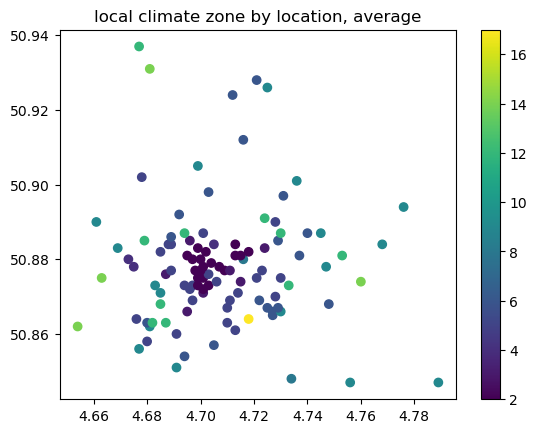

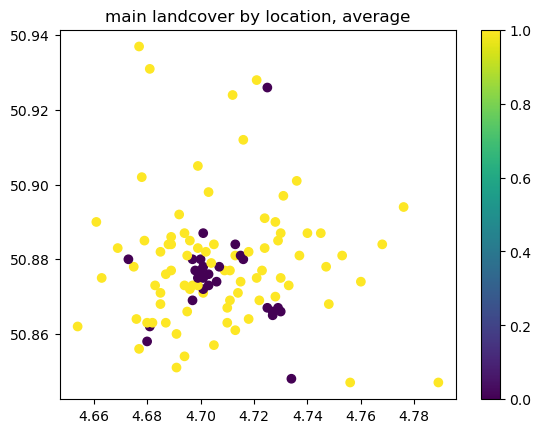

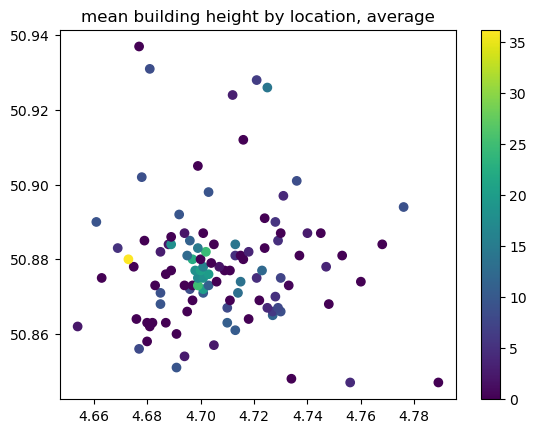

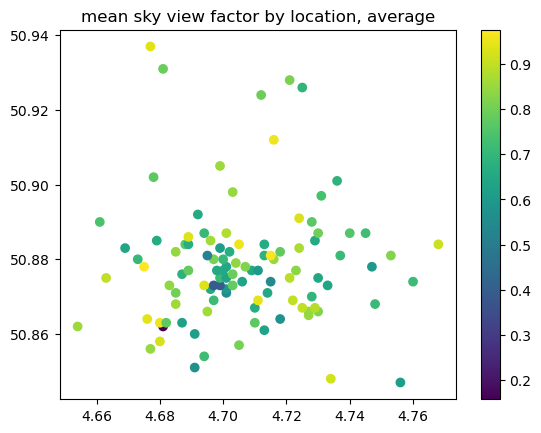

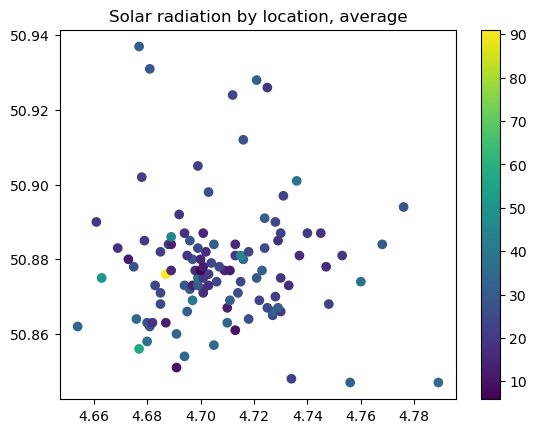

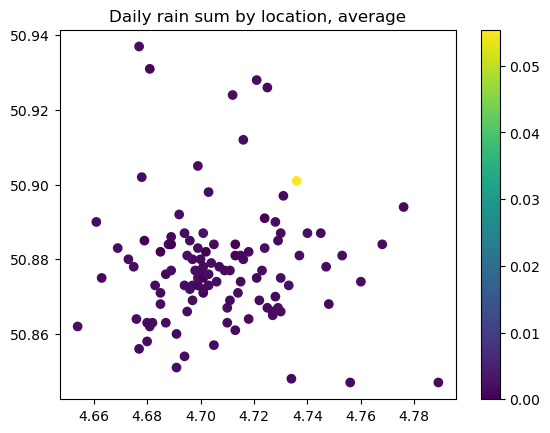

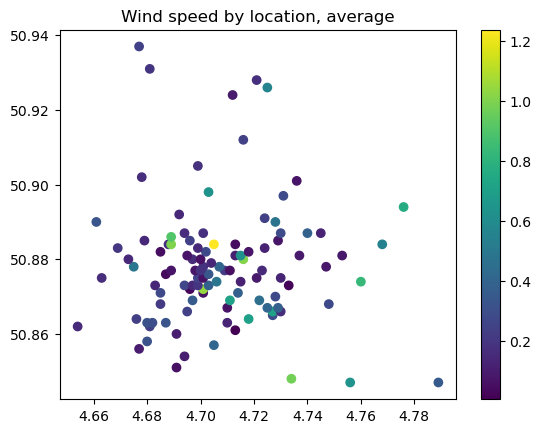

In [103]:
interested_feature_list= {'LCZ': 'local climate zone',
               'LC': 'main landcover',
                'building_height': 'mean building height',
               'SVF': 'mean sky view factor',
               'LC_RAD': 'Solar radiation',
               'LC_DAILYRAIN': 'Daily rain sum',
               'LC_WINDSPEED': 'Wind speed'}

for key, name in interested_feature_list.items():
    plot_a_feature_in_map(df, key, feature_list)

In [110]:
def plot_correlation_matrix(data, title = "Correlation Matrix", figsize = (10,10)):
    """
    Plots a correlation matrix for the input data.
    """
    corr_matrix = data.corr()
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5, square=True)
    ax.set_title(title) 
    #return corr_matrix

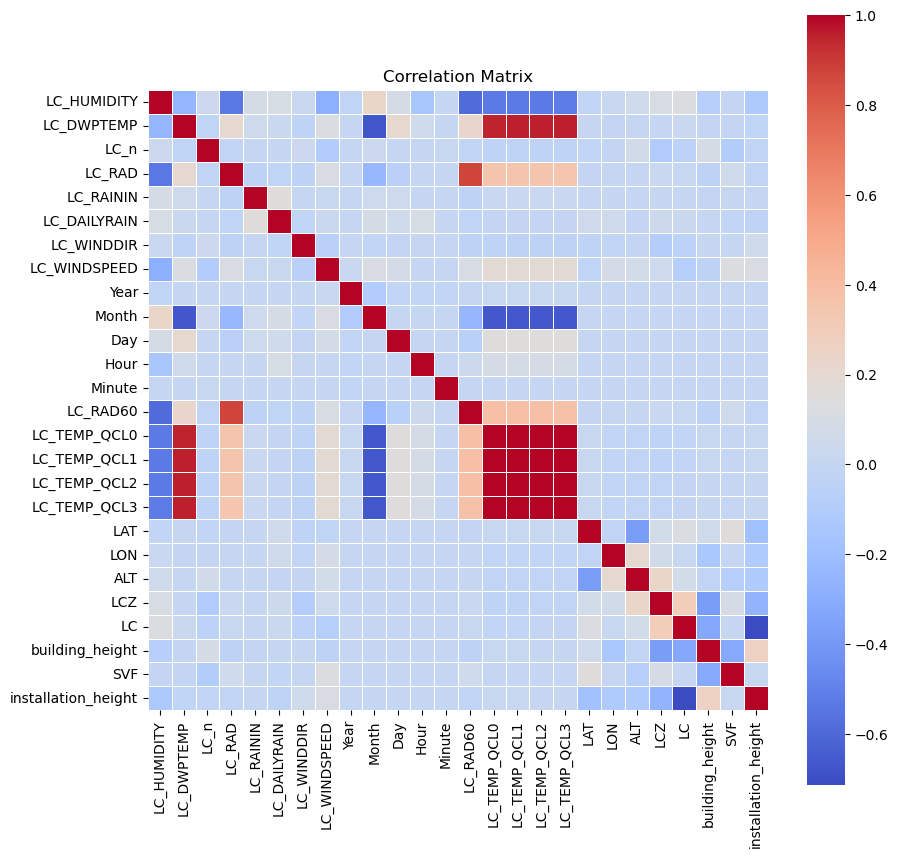

In [111]:
plot_correlation_matrix(df)

In [120]:
def plot_weather_info(feature_list_weather, by = 'Month'):
    
    for key, name in feature_list_weather.items():
        sns.boxplot(x=by, y=key, data=df)
        plt.title(name + ' ' + by)
        plt.show()    

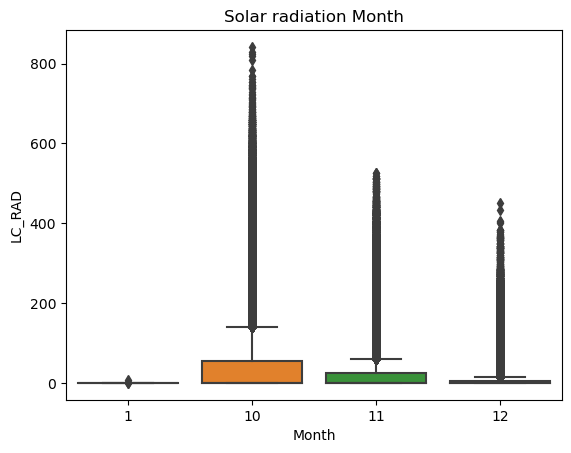

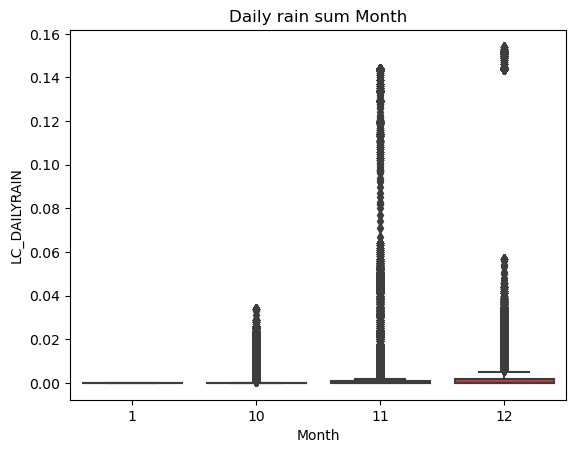

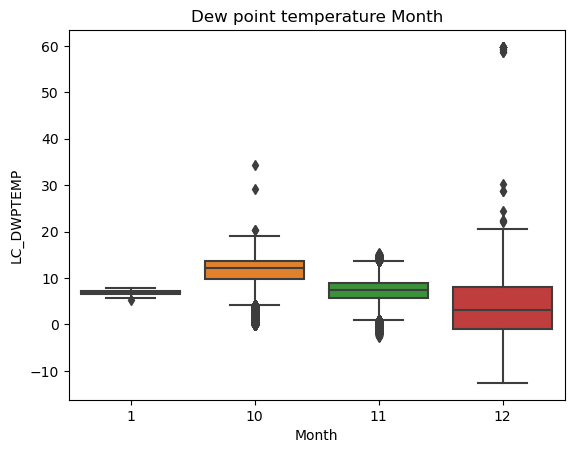

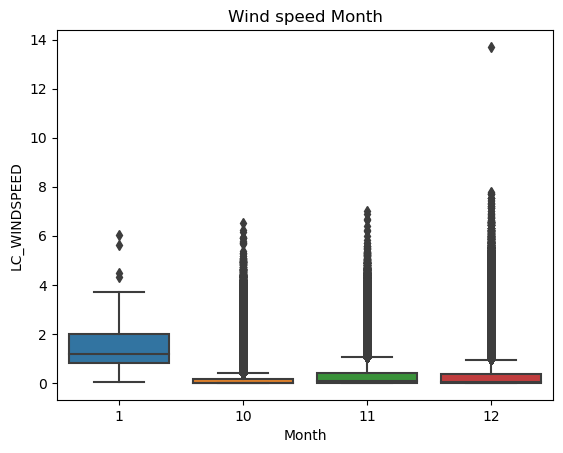

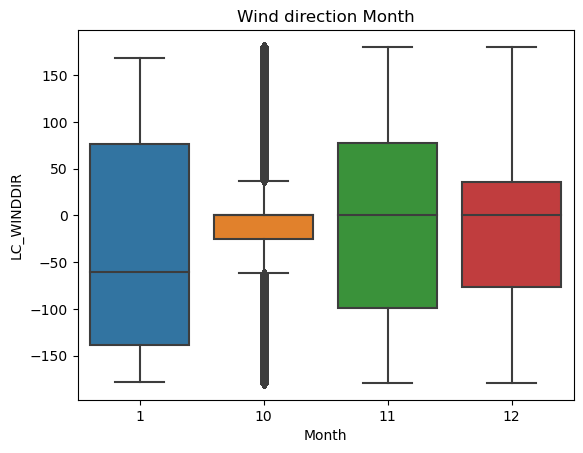

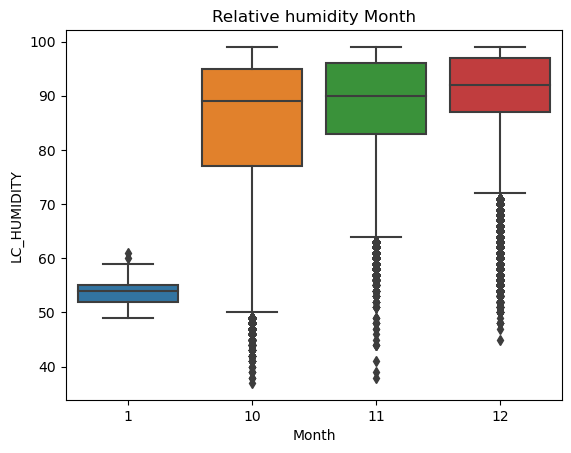

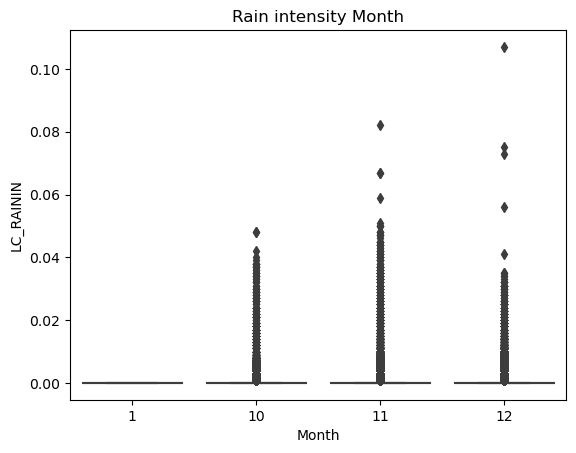

In [127]:
feature_list_weather={'LC_RAD': 'Solar radiation',
     'LC_DAILYRAIN': 'Daily rain sum',
     'LC_DWPTEMP':  'Dew point temperature',
     'LC_WINDSPEED': 'Wind speed',
     'LC_WINDDIR': 'Wind direction', 'LC_HUMIDITY': 'Relative humidity',
                 'LC_RAININ': 'Rain intensity'}

plot_weather_info(feature_list_weather, by = 'Month')

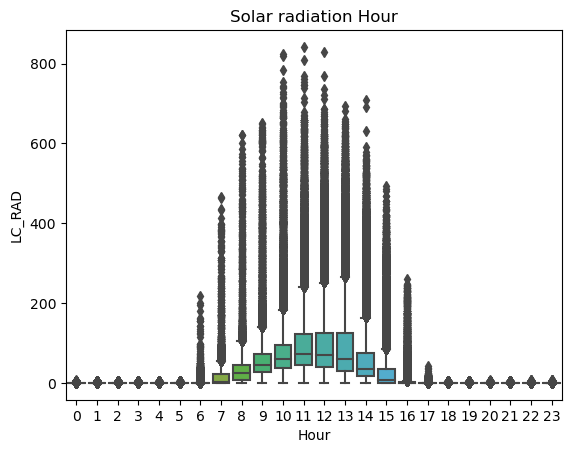

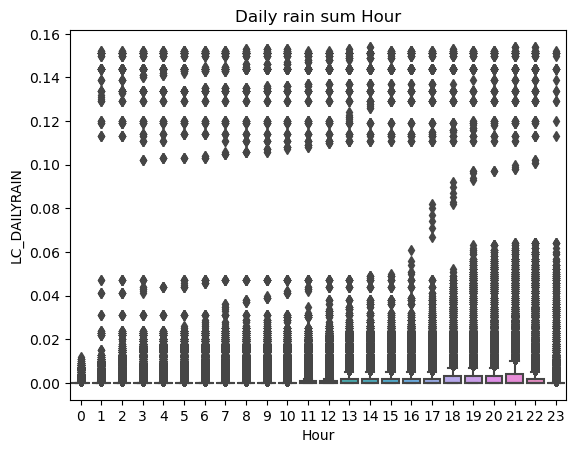

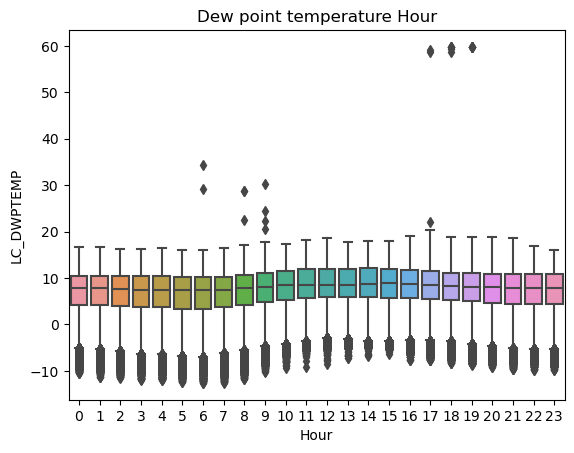

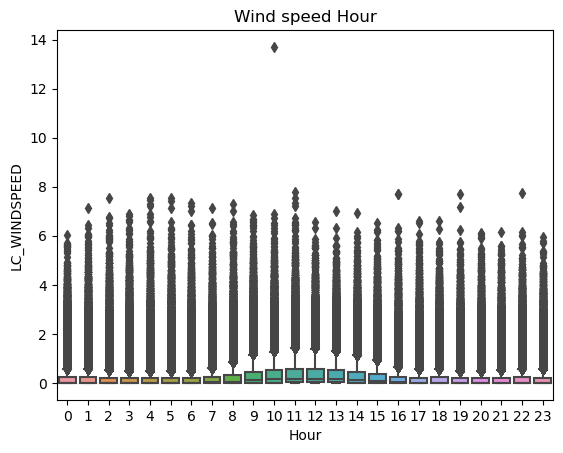

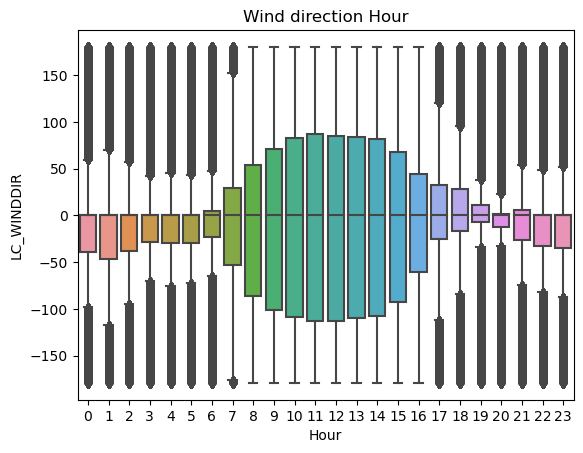

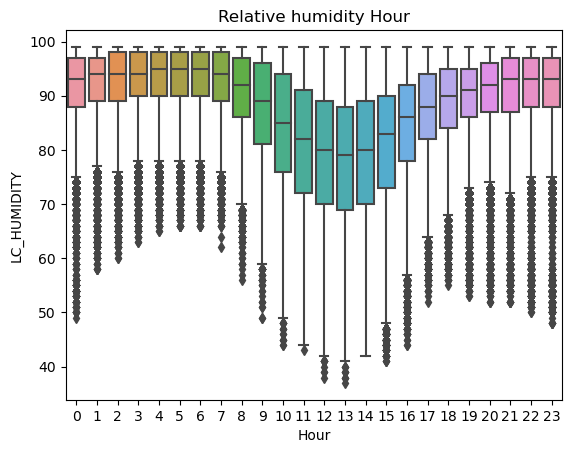

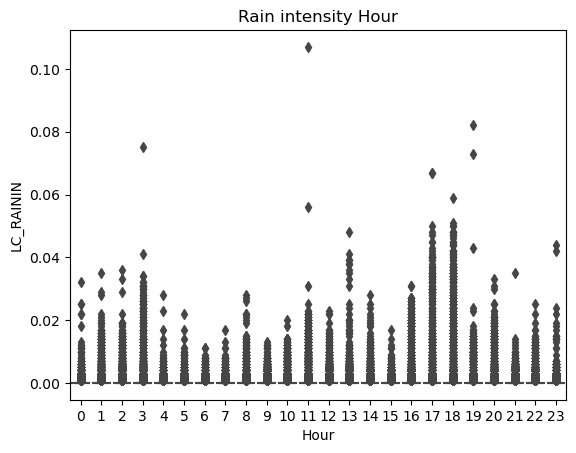

In [128]:
plot_weather_info(feature_list_weather, by = 'Hour')

In [132]:
def get_nan_percent(df):
    print(df.isna().sum()/df.shape[0])
get_nan_percent(df)

DATEUTC                0.000000
ID                     0.000000
LC_HUMIDITY            0.058037
LC_DWPTEMP             0.058037
LC_n                   0.058037
LC_RAD                 0.058037
LC_RAININ              0.058037
LC_DAILYRAIN           0.058037
LC_WINDDIR             0.058037
LC_WINDSPEED           0.058037
Date                   0.000000
Year                   0.000000
Month                  0.000000
Day                    0.000000
Hour                   0.000000
Minute                 0.000000
LC_RAD60               0.049988
LC_TEMP_QCL0           0.058037
LC_TEMP_QCL1           0.065340
LC_TEMP_QCL2           0.065340
LC_TEMP_QCL3           0.065340
LAT                    0.000000
LON                    0.000000
ALT                    0.000000
LCZ                    0.000000
LC                     0.000000
building_height        0.000000
SVF                    0.018519
installation_height    0.000000
dtype: float64


# Ideas

In [134]:
# weather could imply how likely people will go out

# identify the main time and location of noise (nosie events)

# identify source of noise (external data: open street maps for point of interests, e.g.bars, 
                           # distance to main districts
                           # main events, special holidays, sports events, semester dates)

# how does noise propagate or cancel (e.g. building type?)

# the people intensity in an area

# predict the noise level based on the data (building height, wind directions, time of day)